<a href="https://colab.research.google.com/github/tubagokhan/RegNLPDataset/blob/main/QA-NLIValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence_transformers
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the pre-trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained('cross-encoder/nli-deberta-v3-xsmall')
tokenizer = AutoTokenizer.from_pretrained('cross-encoder/nli-deberta-v3-xsmall')

def process_json(input_file, output_file):
    # Load the JSON data
    with open(input_file, 'r') as f:
        data = json.load(f)

    # Define the label mapping
    label_mapping = ['contradiction', 'entailment', 'neutral']

    # Initialize a counter for the items
    item_number = 0

    # Process each item in the JSON
    for item in data:
        # Increment the item counter
        item_number += 1

        premise = item['Passage']
        hypothesis = item['Question']

        # Tokenize the premise and hypothesis
        features = tokenizer(premise, hypothesis, padding=True, truncation=True, return_tensors="pt")

        # Perform inference
        model.eval()
        with torch.no_grad():
            logits = model(**features).logits
            prediction = label_mapping[logits.argmax(dim=1).item()]

        # Add the 'Relation' key with the model's prediction
        item['Relation'] = prediction

        # Print the item number
        print(f"Item number: {item_number}")

    # Save the modified data to a new JSON file
    with open(output_file, 'w') as f:
        json.dump(data, f, indent=4)

# Specify the input and output file paths
input_file = '/content/drive/Othercomputers/MBZUAI/MBZUAI/ADGM-Project/ADGM Docs Study/ArtificialDataset/COBS_VER15.150823_raw_questions.json'  # Update this path to your actual file path
output_file = '/content/drive/Othercomputers/MBZUAI/MBZUAI/ADGM-Project/ADGM Docs Study/ArtificialDataset/COBS_VER15.150823_validated_questions.json'  # Choose a path for the output file

# Process the JSON file
process_json(input_file, output_file)


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/283M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/419 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Item number: 1
Item number: 2
Item number: 3
Item number: 4
Item number: 5
Item number: 6
Item number: 7
Item number: 8
Item number: 9
Item number: 10
Item number: 11
Item number: 12
Item number: 13
Item number: 14
Item number: 15
Item number: 16
Item number: 17
Item number: 18
Item number: 19
Item number: 20
Item number: 21
Item number: 22
Item number: 23
Item number: 24
Item number: 25
Item number: 26
Item number: 27
Item number: 28
Item number: 29
Item number: 30
Item number: 31
Item number: 32
Item number: 33
Item number: 34
Item number: 35
Item number: 36
Item number: 37
Item number: 38
Item number: 39
Item number: 40
Item number: 41
Item number: 42
Item number: 43
Item number: 44
Item number: 45
Item number: 46
Item number: 47
Item number: 48
Item number: 49
Item number: 50
Item number: 51
Item number: 52
Item number: 53
Item number: 54
Item number: 55
Item number: 56
Item number: 57
Item number: 58
Item number: 59
Item number: 60
Item number: 61
Item number: 62
Item number: 63
I

In [3]:
def print_label_counts(input_file):
    # Load the JSON data
    with open(input_file, 'r') as f:
        data = json.load(f)

    # Initialize a dictionary to hold the count of each label
    label_counts = {'contradiction': 0, 'entailment': 0, 'neutral': 0}

    # Iterate over each item and increment the count for the corresponding label
    for item in data:
        if 'Relation' in item:
            label_counts[item['Relation']] += 1

    # Print the count of each label
    for label, count in label_counts.items():
        print(f"{label}: {count}")

# Specify the path to the latest JSON file
input_file = '/content/drive/Othercomputers/MBZUAI/MBZUAI/ADGM-Project/ADGM Docs Study/ArtificialDataset/COBS_VER15.150823_validated_questions.json'  # Update this path to your actual file path

# Call the function to print the count of labels
print_label_counts(input_file)


contradiction: 163
entailment: 1518
neutral: 2170


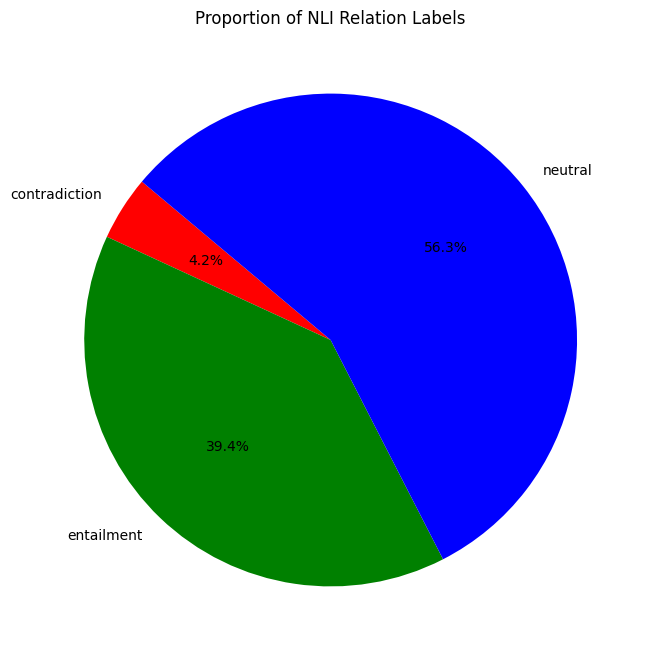

In [4]:
import matplotlib.pyplot as plt

def plot_label_counts(input_file):
    # Load the JSON data
    with open(input_file, 'r') as f:
        data = json.load(f)

    # Initialize a dictionary to hold the count of each label
    label_counts = {'contradiction': 0, 'entailment': 0, 'neutral': 0}

    # Iterate over each item and increment the count for the corresponding label
    for item in data:
        if 'Relation' in item:
            label_counts[item['Relation']] += 1

    # Data for plotting
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'blue'])
    plt.title('Proportion of NLI Relation Labels')
    plt.show()

# Specify the path to the latest JSON file
input_file = '/content/drive/Othercomputers/MBZUAI/MBZUAI/ADGM-Project/ADGM Docs Study/ArtificialDataset/COBS_VER15.150823_validated_questions.json'  # Update this path to your actual file path

# Call the function to plot the count of labels
plot_label_counts(input_file)


In [5]:
import json

def filter_and_save_json(input_file_path, output_file_path):
    # Load the JSON data from the file
    with open(input_file_path, 'r') as file:
        data = json.load(file)

    # Filter out entries where "Relation" is not "entailment" and remove the "Relation" key
    filtered_data = [entry for entry in data if entry.get('Relation') == 'entailment']
    for entry in filtered_data:
        del entry['Relation']

    # Save the modified data back to a new JSON file
    with open(output_file_path, 'w') as file:
        json.dump(filtered_data, file, indent=4)

    print(f"Filtered data saved to {output_file_path}")

# Specify the input and output file paths
input_file_path = '/content/drive/Othercomputers/MBZUAI/MBZUAI/ADGM-Project/ADGM Docs Study/ArtificialDataset/COBS_VER15.150823_validated_questions.json'  # Update this to your input file path
output_file_path = '/content/drive/Othercomputers/MBZUAI/MBZUAI/ADGM-Project/ADGM Docs Study/ArtificialDataset/COBS_VER15.150823_entailed_questions.json'  # The output file will be saved in the current directory

# Call the function with the specified file paths
filter_and_save_json(input_file_path, output_file_path)


Filtered data saved to /content/drive/Othercomputers/MBZUAI/MBZUAI/ADGM-Project/ADGM Docs Study/ArtificialDataset/COBS_VER15.150823_entailed_questions.json
